In [21]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt


In [22]:
import numpy as np
import pandas as pd
import datetime as dt


# Reflect Tables into SQLAlchemy ORM

In [23]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func


In [24]:
# Create engine using the `hawaii.sqlite` database file
engine = create_engine("sqlite:///Resources/hawaii.sqlite")


In [25]:
# Declare a Base using `automap_base()`
Base = automap_base()
# Use the Base class to reflect the database tables
Base.prepare(autoload_with=engine)

In [26]:
# Print all of the classes mapped to the Base
Base.classes.keys()

['measurement', 'station']

In [27]:
# Assign the measurement class to a variable called `Measurement` and
# the station class to a variable called `Station`
Measurement = Base.classes.measurement
Station = Base.classes.station

In [28]:
# Create a session
session = Session(engine)

# Exploratory Precipitation Analysis

In [29]:
# Find the most recent date in the data set.
last_date = session.query(func.max(Measurement.date)).first()
last_date

('2017-08-23',)

In [30]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results.
# Starting from the most recent data point in the database.
# the last date has been calculated and stored as last_date
# Calculate the date one year from the last date in data set.
last_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)


In [31]:
# confirm last year calculated correctly
last_year

datetime.date(2016, 8, 23)

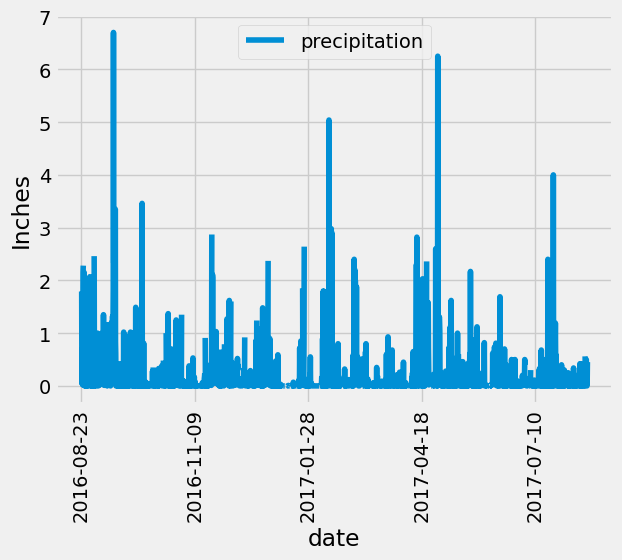

In [33]:
# Perform a query to retrieve the data and precipitation scores
precip_scores = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= last_year).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
precip_scores_df = pd.DataFrame(precip_scores, columns=['date', 'precipitation'])

# Sort the dataframe by date
precip_scores_df = precip_scores_df.sort_values('date')

# Use Pandas Plotting with Matplotlib to plot the data
precip_scores_df.plot(x='date', y='precipitation', rot=90)
plt.ylabel("Inches")
plt.show()

In [34]:
# Use Pandas to calculate the summary statistics for the precipitation data
precip_scores_df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [35]:
# Design a query to calculate the total number of stations in the dataset
session.query(func.count(Station.station)).all()

[(9,)]

In [36]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [37]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
# station USC00519281 is the most active, entering this station id as filter parameter
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).filter\
    (Measurement.station == 'USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

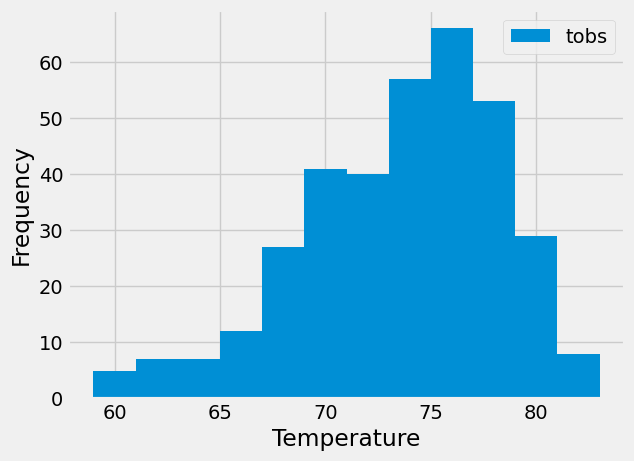

In [38]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
station_results = session.query(Measurement.tobs).filter(Measurement.station == 'USC00519281').filter\
    (Measurement.date >= last_year).all()
station_results_df = pd.DataFrame(station_results, columns=['tobs'])
station_results_df.plot.hist(bins=12)
plt.xlabel("Temperature")
plt.show()

# Close Session

In [39]:
# Close Session
session.close()
